In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
results = pd.read_csv("../otherScripts/hpsweep/sweepResults.txt")
results

EmptyDataError: No columns to parse from file

(array([61., 14., 12.,  6.,  2.,  4.,  3.,  1.,  2.,  3.]),
 array([0.29041 , 0.376775, 0.46314 , 0.549505, 0.63587 , 0.722235,
        0.8086  , 0.894965, 0.98133 , 1.067695, 1.15406 ]),
 <a list of 10 Patch objects>)

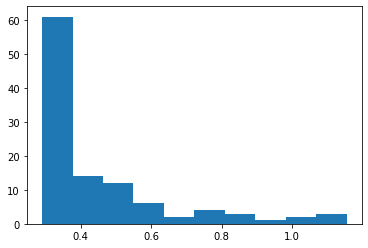

In [10]:
plt.hist(results['area'])

In [1]:
#Global best params 
id_R2 = results['R2'].argsort()[::-1][0]
id_skill = results['skill'].argsort()[::-1][0]
id_area = results['area'].argsort()[0]
id_L2 = results['L2'].argsort()[0]

print("            kappa             tau_stdp      tau_sr          asymm             frac")
print("R2:         %.2f      %.2f      %.2f      %.2f      %.2f" %(results['kappa'][id_R2].mean(),results['tau_stdp'][id_R2].mean(),results['tau_sr'][id_R2].mean(),results['asymm'][id_R2].mean(),results['frac'][id_R2].mean()))
print("skill:      %.2f      %.2f      %.2f      %.2f      %.2f" %(results['kappa'][id_skill].mean(),results['tau_stdp'][id_skill].mean(),results['tau_sr'][id_skill].mean(),results['asymm'][id_skill].mean(),results['frac'][id_skill].mean()))
print("area:       %.2f      %.2f      %.2f      %.2f      %.2f" %(results['kappa'][id_area].mean(),results['tau_stdp'][id_area].mean(),results['tau_sr'][id_area].mean(),results['asymm'][id_area].mean(),results['frac'][id_area].mean()))
print("L2:         %.2f      %.2f      %.2f      %.2f      %.2f" %(results['kappa'][id_L2].mean(),results['tau_stdp'][id_L2].mean(),results['tau_sr'][id_L2].mean(),results['asymm'][id_L2].mean(),results['frac'][id_L2].mean()))


#And for each tau_sr

NameError: name 'results' is not defined

In [43]:
top = 5

id_R2 = results['R2'].argsort()[::-1][:top]
id_skill = results['skill'].argsort()[::-1][:top]
id_area = results['area'].argsort()[:top]
id_L2 = results['L2'].argsort()[:top]

print("            kappa             tau_stdp          asymm             frac")
print("R2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_R2].mean(),results['kappa'][id_R2].std(),results['tau_stdp'][id_R2].mean(),results['tau_stdp'][id_R2].std(),results['asymm'][id_R2].mean(),results['asymm'][id_R2].std(),results['frac'][id_R2].mean(),results['frac'][id_R2].std()))
print("skill:      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_skill].mean(),results['kappa'][id_skill].std(),results['tau_stdp'][id_skill].mean(),results['tau_stdp'][id_skill].std(),results['asymm'][id_skill].mean(),results['asymm'][id_skill].std(),results['frac'][id_skill].mean(),results['frac'][id_skill].std()))
print("area:       %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_area].mean(),results['kappa'][id_area].std(),results['tau_stdp'][id_area].mean(),results['tau_stdp'][id_area].std(),results['asymm'][id_area].mean(),results['asymm'][id_area].std(),results['frac'][id_area].mean(),results['frac'][id_area].std()))
print("L2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_L2].mean(),results['kappa'][id_L2].std(),results['tau_stdp'][id_L2].mean(),results['tau_stdp'][id_L2].std(),results['asymm'][id_L2].mean(),results['asymm'][id_L2].std(),results['frac'][id_L2].mean(),results['frac'][id_L2].std()))


            kappa             tau_stdp          asymm             frac
R2:         0.60 +- 0.22      0.13 +- 0.09      0.70 +- 0.14      0.72 +- 0.18
skill:      1.00 +- 0.61      0.03 +- 0.00      0.82 +- 0.08      0.60 +- 0.00
area:       1.40 +- 0.55      0.03 +- 0.00      0.64 +- 0.05      0.80 +- 0.14
L2:         1.00 +- 0.61      0.03 +- 0.00      0.82 +- 0.08      0.60 +- 0.00


In [32]:
results['frac'][id_R2].mean()

0.6799999999999999